In [1]:
import mne
import numpy as np
import mne
import numpy as np
import os
import pandas as pd
from pathlib import Path

# Import the FOOOF object
from fooof import FOOOF
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

import warnings
warnings.filterwarnings("ignore")

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# KNEE freqs
from fooof.utils.params import compute_knee_frequency

# Plotting functions
import matplotlib.pyplot as plt
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn as sns
import imagesc as imagesc

In [159]:
# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/Aperiodic_sleep_paper/helpers")
from utils import check_distribution, perform_correlation, compute_z_values, bonferroni_correction, friedman_dunns
from plots import plot_annotated_modelx

In [4]:
# Time parametres for broadband analysis
Time_segments = [ 5,  10, 15, 20] # seconds
f_max = [30, 45 , 60, 75] # Hz

# Setting for welch
f_min = 1
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min }

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'fixed'}

In [5]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')

# Set dataset
dataset = 'Wakefulness_AllRegions'

# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

W_Kn  = np.zeros([len(regions)-4,16])*np.nan
W_Exp = np.zeros([len(regions)-4,16])*np.nan
W_R2 = np.zeros([len(regions)-4,16])*np.nan
W_ExpF = np.zeros([len(regions)-4,16])*np.nan
W_R2F = np.zeros([len(regions)-4,16])*np.nan

N2_Kn  = np.zeros([len(regions)-4,16])*np.nan
N2_Exp = np.zeros([len(regions)-4,16])*np.nan
N2_R2 = np.zeros([len(regions)-4,16])*np.nan
N2_ExpF = np.zeros([len(regions)-4,16])*np.nan
N2_R2F = np.zeros([len(regions)-4,16])*np.nan

N3_Kn  = np.zeros([len(regions)-4,16])*np.nan
N3_Exp = np.zeros([len(regions)-4,16])*np.nan
N3_R2 = np.zeros([len(regions)-4,16])*np.nan
N3_ExpF = np.zeros([len(regions)-4,16])*np.nan
N3_R2F = np.zeros([len(regions)-4,16])*np.nan

R_Kn  = np.zeros([len(regions)-4,16])*np.nan
R_Exp = np.zeros([len(regions)-4,16])*np.nan
R_R2 = np.zeros([len(regions)-4,16])*np.nan
R_ExpF = np.zeros([len(regions)-4,16])*np.nan
R_R2F = np.zeros([len(regions)-4,16])*np.nan

# WAKE

In [6]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                W_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                W_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                W_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                W_Kn[i,ii]   = np.nan
                W_Exp[i,ii]  = np.nan
                W_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                W_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                W_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                W_ExpF[i,ii] = np.nan
                W_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.0

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial frontal cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial segment of precentral gyrus_W.edf...
EDF file detected
Setting channel info structure..

Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Posterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extr

Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window 

# N2

In [7]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [8]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                N2_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N2_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N2_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                N2_Kn[i,ii]   = np.nan
                N2_Exp[i,ii]  = np.nan
                N2_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                N2_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N2_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                N2_ExpF[i,ii] = np.nan
                N2_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Medial segment of precentral gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Posterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# N3

In [9]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [10]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                N3_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N3_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N3_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                N3_Kn[i,ii]   = np.nan
                N3_Exp[i,ii]  = np.nan
                N3_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                N3_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N3_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                N3_ExpF[i,ii] = np.nan
                N3_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Medial segment of precentral gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Posterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# REM

In [11]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [12]:
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for f in f_max:

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmax=f, n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                 
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                R_Kn[i,ii]   = fm1.get_params('aperiodic_params','knee')
                R_Exp[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                R_R2[i,ii]   = fm1.get_params('r_squared')
            else:
                R_Kn[i,ii]   = np.nan
                R_Exp[i,ii]  = np.nan
                R_R2[i,ii]   = np.nan
                
            if fm2.has_model:
                R_ExpF[i,ii] = fm2.get_params('aperiodic_params','exponent')
                R_R2F[i,ii]  = fm2.get_params('r_squared')
            else:
                R_ExpF[i,ii] = np.nan
                R_R2F[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial frontal cortex_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial segment of precentral gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window si

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Eff

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Triangular part of inferior frontal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# PLOTTING - Knee Model

## R2

In [13]:
# now we can mean over regions 
R2_W = np.nanmean(W_R2,0)
R2_N2 = np.nanmean(N2_R2,0)
R2_N3 = np.nanmean(N3_R2,0)
R2_R = np.nanmean(R_R2,0)

R2_all = np.nanmean([R2_W , R2_N2 , R2_N3 , R2_R], 0)

R2_all_final = np.reshape(R2_all, (4, 4))

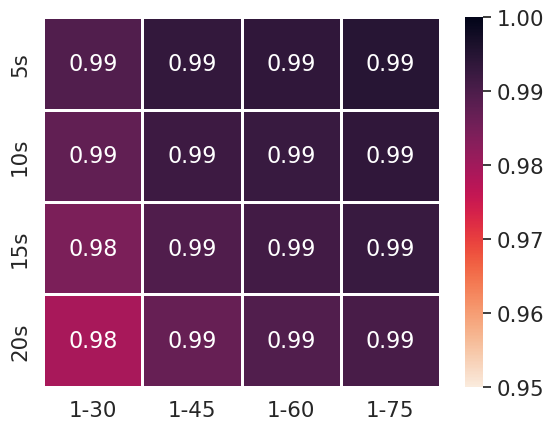

In [29]:
import seaborn as sns
sns.set(font_scale=1.4)
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_final,columns=['1-30', '1-45','1-60','1-75'], index=['5s','10s','15s', '20s'])
sns.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Broadband_Knee_R2_NewFreqs.svg")


## Exponent

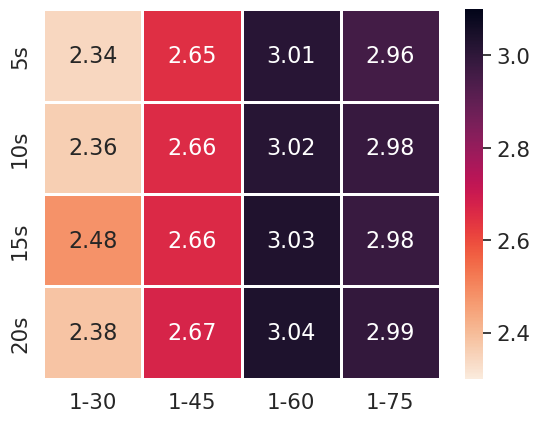

In [57]:
# now we can mean over regions 
E_W = np.nanmean(W_Exp,0)
E_N2 = np.nanmean(N2_Exp,0)
E_N3 = np.nanmean(N3_Exp,0)
E_R = np.nanmean(R_Exp,0)

E_all = np.nanmean([E_W , E_N2 , E_N3 , E_R], 0)

E_all_final = np.reshape(E_all, (4, 4))

# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E_all_final,columns=['1-30', '1-45','1-60','1-75'], index=['5s','10s','15s', '20s'])
sns.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=2.3, vmax=3.1)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Broadband_Knee_Exp_NewFreqs.svg")

# Plotting - Fixed M

## R2

In [36]:
# now we can mean over regions 
R2_W2 = np.nanmean(W_R2F,0)
R2_N22 = np.nanmean(N2_R2F,0)
R2_N32 = np.nanmean(N3_R2F,0)
R2_R2 = np.nanmean(R_R2F,0)

R2_all2 = np.nanmean([R2_W2 , R2_N22 , R2_N32 , R2_R2], 0)

R2_all_final2 = np.reshape(R2_all2, (4, 4))

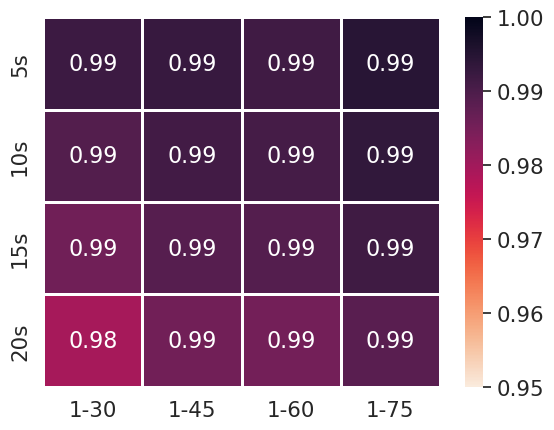

In [38]:
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_final2,columns=['1-30', '1-45','1-60','1-75'], index=['5s','10s','15s', '20s'])

sns.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)


plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Broadband_Fixed_R2_NewFreqs.svg")


## Exponent


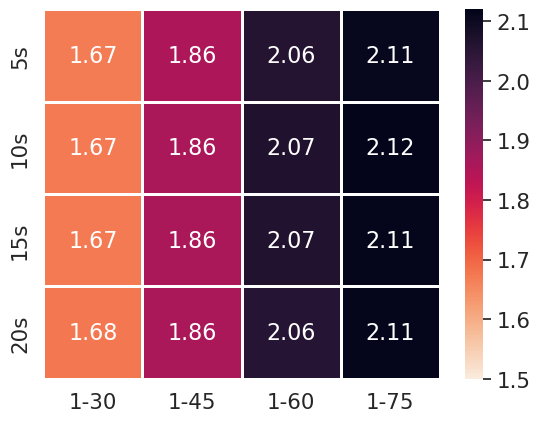

In [62]:
# now we can mean over regions 
E2_W2 = np.nanmean(W_ExpF,0)
E2_N22 = np.nanmean(N2_ExpF,0)
E2_N32 = np.nanmean(N3_ExpF,0)
E2_R2 = np.nanmean(R_ExpF,0)

E2_all2 = np.nanmean([E2_W2 , E2_N22 , E2_N32 , E2_R2], 0)

E2_all_final2 = np.reshape(E2_all2, (4, 4))

# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E2_all_final2,columns=['1-30', '1-45','1-60','1-75'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=1.5, vmax=2.12)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Broadband_Fixed_Exp_NewFreqs.svg")

# NARROW BANDS


In [41]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')

# Set dataset
dataset = 'Wakefulness_AllRegions'

# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

W_KnN  = np.zeros([len(regions)-4,16])*np.nan
W_ExpN = np.zeros([len(regions)-4,16])*np.nan
W_R2N = np.zeros([len(regions)-4,16])*np.nan
W_ExpFN = np.zeros([len(regions)-4,16])*np.nan
W_R2FN = np.zeros([len(regions)-4,16])*np.nan

N2_KnN  = np.zeros([len(regions)-4,16])*np.nan
N2_ExpN = np.zeros([len(regions)-4,16])*np.nan
N2_R2N = np.zeros([len(regions)-4,16])*np.nan
N2_ExpFN = np.zeros([len(regions)-4,16])*np.nan
N2_R2FN = np.zeros([len(regions)-4,16])*np.nan

N3_KnN  = np.zeros([len(regions)-4,16])*np.nan
N3_ExpN = np.zeros([len(regions)-4,16])*np.nan
N3_R2N = np.zeros([len(regions)-4,16])*np.nan
N3_ExpFN = np.zeros([len(regions)-4,16])*np.nan
N3_R2FN = np.zeros([len(regions)-4,16])*np.nan

R_KnN  = np.zeros([len(regions)-4,16])*np.nan
R_ExpN = np.zeros([len(regions)-4,16])*np.nan
R_R2N = np.zeros([len(regions)-4,16])*np.nan
R_ExpFN = np.zeros([len(regions)-4,16])*np.nan
R_R2FN = np.zeros([len(regions)-4,16])*np.nan

In [42]:
fs    = 200

SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean' }
#SETTINGS_F1 = {'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2 = {'max_n_peaks':8, 'aperiodic_mode':'fixed'}

In [43]:
# Time parametres for broadband analysis
Time_segments = [ 5,  10, 15, 20] # seconds
f_min = [1, 1 , 20, 30] # Hz
f_max = [8, 20 , 45, 45] # Hz

In [44]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin=f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                W_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                W_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                W_R2N[i,ii]   = fm1.get_params('r_squared')    
            else:
                W_KnN[i,ii]   = np.nan
                W_ExpN[i,ii]  = np.nan
                W_R2N[i,ii]   = np.nan  
            
            if fm2.has_model:
                W_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
                W_R2FN[i,ii]  = fm2.get_params('r_squared')
            else:
                W_ExpFN[i,ii] = np.nan
                W_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.0

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial frontal cortex_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Medial segment of precentral gyrus_W.edf...
EDF file detected
Setting channel info structure..

Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Posterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extr

Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Triangular part of inferior frontal gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window 

# N2

In [45]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

#START
i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin = f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)

            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                N2_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N2_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N2_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                N2_KnN[i,ii]   = np.nan
                N2_ExpN[i,ii]  = np.nan
                N2_R2N[i,ii]   = np.nan
                
            if fm2.has_model:
                N2_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N2_R2FN[i,ii]  = fm2.get_params('r_squared')
            else:
                N2_ExpFN[i,ii] = np.nan
                N2_R2FN[i,ii]  = np.nan
                
            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Medial segment of precentral gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Posterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# N3

In [46]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    # LOAD DATA
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    
    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin= f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            #paramters
            if fm1.has_model:
                N3_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                N3_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                N3_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                N3_KnN[i,ii]   = np.nan
                N3_ExpN[i,ii]  = np.nan
                N3_R2N[i,ii]   = np.nan
                
            if fm2.has_model:
                N3_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
                N3_R2FN[i,ii]  = fm2.get_params('r_squared')
            else:
                N3_ExpFN[i,ii] = np.nan
                N3_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective w

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Medial segment of precentral gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Posterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effecti

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# R

In [47]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

i =0 
for C, V in enumerate(regions):
    
    # IGNORE NON-CORTICAL AREAS
    if C == 0 or C== 8 or C==10 or C==35:
        continue
    
    EEG = mne.io.read_raw_edf(data_path / dataset / V)

    ii=0    
    for t in Time_segments:
        for x in np.arange(4):

            EEG_psd = EEG.compute_psd(**SETTINGS_W, fmin= f_min[x], fmax=f_max[x], n_fft=fs*t, n_overlap=fs*t*0.5)
    
            fm1 = FOOOF(**SETTINGS_F1)
            fm1.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
                 
            fm2 = FOOOF(**SETTINGS_F2)
            fm2.fit(EEG_psd._freqs, np.mean(EEG_psd._data,0), [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
            
            # parameters exctract
            if fm1.has_model:
                R_KnN[i,ii]   = fm1.get_params('aperiodic_params','knee')
                R_ExpN[i,ii]  = fm1.get_params('aperiodic_params','exponent')
                R_R2N[i,ii]   = fm1.get_params('r_squared')
            else:
                R_KnN[i,ii]   = np.nan
                R_ExpN[i,ii]  = np.nan
                R_R2N[i,ii]   = np.nan
                
            if fm2.has_model:
                R_ExpFN[i,ii] = fm2.get_params('aperiodic_params','exponent')
                R_R2FN[i,ii]  = fm2.get_params('r_squared')
            else:
                R_ExpFN[i,ii] = np.nan
                R_R2FN[i,ii]  = np.nan

            ii = ii +1
    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial frontal cortex_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Medial segment of precentral gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window si

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Posterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Eff

Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Model fitting was unsuccessful.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Triangular part of inferior frontal gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 5.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 10.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 15.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)
Effective window size : 20.000 (s)


# PLOTTING - Knee

## R2

In [49]:
# now we can mean over regions 
R2_WN = np.nanmean(W_R2N,0)
R2_N2N = np.nanmean(N2_R2N,0)
R2_N3N = np.nanmean(N3_R2N,0)
R2_RN = np.nanmean(R_R2N,0)

R2_allN = np.nanmean([R2_WN , R2_N2N , R2_N3N , R2_RN], 0)

R2_all_finalN = np.reshape(R2_allN, (4, 4))

# Compare Broad and Narrow

In [71]:
import scipy
X = scipy.stats.normaltest(np.concatenate((R2_allNF, R2_all2), axis = 0), nan_policy='propagate')
X

NormaltestResult(statistic=16.057427515078867, pvalue=0.0003259672122618897)

In [73]:
N= 16
W, p = scipy.stats.wilcoxon(R2_all2, R2_allNF, zero_method='wilcox', alternative='greater') 

r = W / (N * (N + 1) / 2)
r, W, p

(1.0, 136.0, 1.52587890625e-05)

In [76]:
np.std(R2_all2), np.std(R2_allNF)

(0.0037403200166744983, 0.03487393203529429)

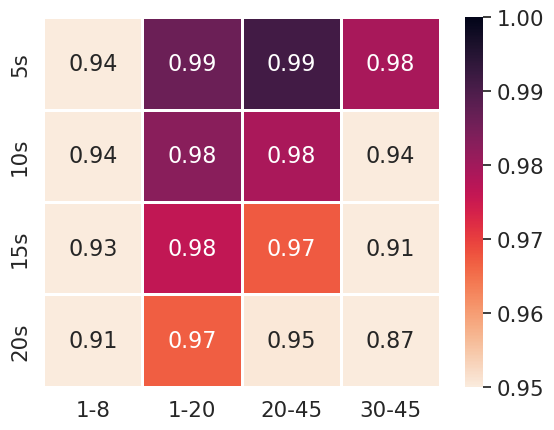

In [63]:
import seaborn

#plt.figure(figsize=(6, 4))
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_finalN,columns=['1-8', '1-20','20-45','30-45'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True,annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)
 
plt.savefig('/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Narrowband_Knee_R2.svg')

## Exponent

In [64]:
# now we can mean over regions 
E_WN = np.nanmean(W_ExpN,0)
E_N2N = np.nanmean(N2_ExpN,0)
E_N3N = np.nanmean(N3_ExpN,0)
E_RN = np.nanmean(R_ExpN,0)


E_allN = np.nanmean([E_WN , E_N2N , E_N3N , E_RN], 0)

E_all_finalN = np.reshape(E_allN, (4, 4))

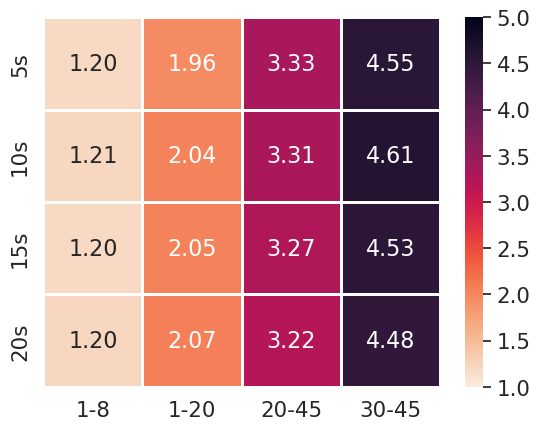

In [66]:
#plt.figure(figsize=(6, 4))
# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E_all_finalN,columns=['1-8', '1-20','20-45','30-45'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=1, vmax=5)

plt.savefig('/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Narrowband_Knee_Exp.svg')

# Plotting - Fixed M

## R2

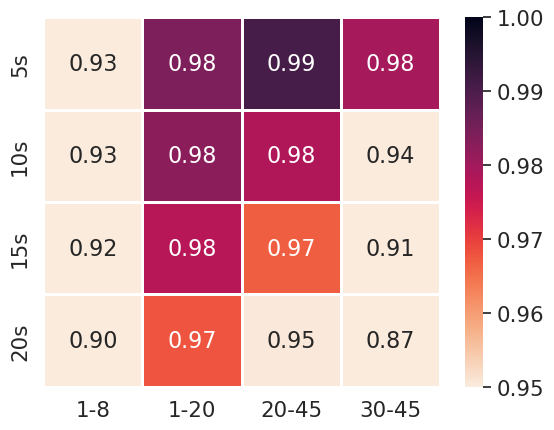

In [67]:
# now we can mean over regions 
R2_WNF = np.nanmean(W_R2FN,0)
R2_N2NF = np.nanmean(N2_R2FN,0)
R2_N3NF = np.nanmean(N3_R2FN,0)
R2_RNF = np.nanmean(R_R2FN,0)

R2_allNF = np.nanmean([R2_WNF , R2_N2NF , R2_N3NF , R2_RNF], 0)

R2_all_finalNF = np.reshape(R2_allNF, (4, 4))

# Now the arrays are ready for plotting 
data_s = pd.DataFrame(R2_all_finalNF,columns=['1-8', '1-20','20-45','30-45'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, annot_kws={"size": 16}, cmap='rocket_r', fmt='.2f', linewidths=1, vmin=0.95, vmax=1.0)

plt.savefig('/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Narrowband_Fixed_R2.svg')

## Exponent

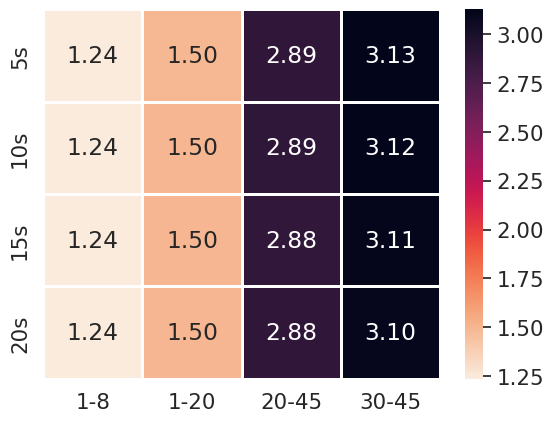

In [68]:
# now we can mean over regions 
E_WNF = np.nanmean(W_ExpFN,0)
E_N2NF = np.nanmean(N2_ExpFN,0)
E_N3NF = np.nanmean(N3_ExpFN,0)
E_RNF = np.nanmean(R_ExpFN,0)

E_allNF = np.nanmean([E_WNF , E_N2NF , E_N3NF , E_RNF], 0)

E_all_finalNF = np.reshape(E_allNF, (4, 4))

# Now the arrays are ready for plotting 
data_s = pd.DataFrame(E_all_finalNF,columns=['1-8', '1-20','20-45','30-45'], index=['5s','10s','15s', '20s'])
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1)

plt.savefig('/home/b1044271/Columbia/Plots/NOV23/iEEG_Sensitivity_Narrowband_Fixed_Exp.svg')

# COMPARING VARIANVES Broadband vs Narrowband


# R2

In [88]:
# R2
array_list_B = [np.nanstd(W_R2F,0), np.nanstd(N2_R2F,0) , np.nanstd(N3_R2F,0), np.nanstd(R_R2F,0)]
array_list_B2 = np.nanmean(array_list_B,0)

array_list_N = [np.nanstd(W_R2FN,0), np.nanstd(N2_R2FN,0) , np.nanstd(N3_R2FN,0), np.nanstd(R_R2FN,0)]
array_list_N2 = np.nanmean(array_list_N,0)

R2_list = np.hstack([np.hstack(array_list_B2) , np.hstack(array_list_N2)])

# EXPONENT
Exp_list_B = [np.nanstd(W_ExpF,0), np.nanstd(N2_ExpF,0) , np.nanstd(N3_ExpF,0), np.nanstd(R_ExpF,0)]
Exp_list_B2 = np.nanmean(Exp_list_B,0)

Exp_list_N = [np.nanstd(W_ExpFN,0), np.nanstd(N2_ExpFN,0) , np.nanstd(N3_ExpFN,0), np.nanstd(R_ExpFN,0)]
Exp_list_N2 = np.nanmean(Exp_list_N,0)

Exp_list = np.hstack([np.hstack(Exp_list_B2) , np.hstack(Exp_list_N2)])

#####
data = {'R2 variance' : R2_list, 'exponent variance' :Exp_list, 
         'range': np.repeat(['broad','narrow'], 16, axis=0)}

data

{'R2 variance': array([0.00517548, 0.00451381, 0.00431356, 0.00242805, 0.00662271,
        0.00430415, 0.00387014, 0.00276191, 0.0086628 , 0.00588874,
        0.00532881, 0.00387446, 0.01512066, 0.00879805, 0.00816293,
        0.00667964, 0.08479622, 0.02557224, 0.00798417, 0.01535513,
        0.06680604, 0.01407576, 0.01619348, 0.03850691, 0.06713056,
        0.01606035, 0.02434263, 0.0538046 , 0.07604347, 0.02284219,
        0.03395285, 0.0744516 ]),
 'exponent variance': array([0.19083682, 0.15951409, 0.13965691, 0.13164725, 0.19134028,
        0.16062081, 0.14275778, 0.13364017, 0.19095764, 0.15951268,
        0.14320878, 0.13275087, 0.19167897, 0.15920577, 0.14199381,
        0.13319292, 0.30491931, 0.22208741, 0.39859967, 0.41923258,
        0.29978216, 0.2106687 , 0.40907481, 0.42414557, 0.30086916,
        0.21180129, 0.3957625 , 0.41496281, 0.29446203, 0.21297205,
        0.40312553, 0.44013086]),
 'range': array(['broad', 'broad', 'broad', 'broad', 'broad', 'broad', 'broad',


Using Spearman correlation
Correlation: 0.8211143695014662
P-value: 8.564582781482862e-09


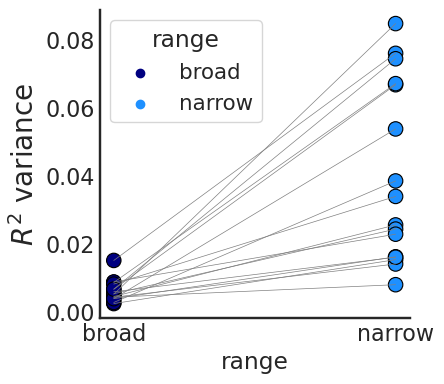

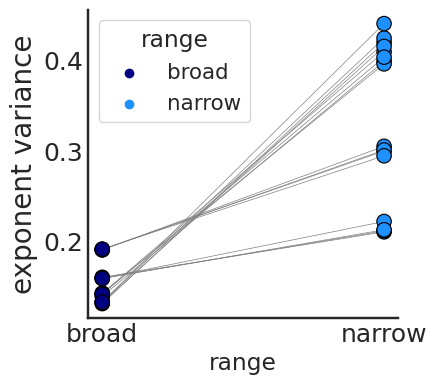

<Figure size 250x250 with 0 Axes>

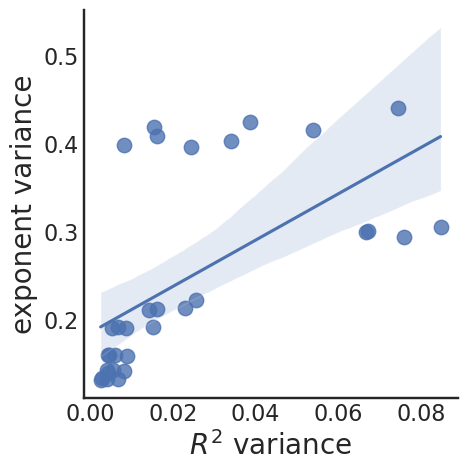

In [194]:
# R2
array_list_B = [np.nanstd(W_R2F,0), np.nanstd(N2_R2F,0) , np.nanstd(N3_R2F,0), np.nanstd(R_R2F,0)]
array_list_B2 = np.nanmean(array_list_B,0)

array_list_N = [np.nanstd(W_R2FN,0), np.nanstd(N2_R2FN,0) , np.nanstd(N3_R2FN,0), np.nanstd(R_R2FN,0)]
array_list_N2 = np.nanmean(array_list_N,0)

R2_list = np.hstack([np.hstack(array_list_B2) , np.hstack(array_list_N2)])

# EXPONENT
Exp_list_B = [np.nanstd(W_ExpF,0), np.nanstd(N2_ExpF,0) , np.nanstd(N3_ExpF,0), np.nanstd(R_ExpF,0)]
Exp_list_B2 = np.nanmean(Exp_list_B,0)

Exp_list_N = [np.nanstd(W_ExpFN,0), np.nanstd(N2_ExpFN,0) , np.nanstd(N3_ExpFN,0), np.nanstd(R_ExpFN,0)]
Exp_list_N2 = np.nanmean(Exp_list_N,0)

Exp_list = np.hstack([np.hstack(Exp_list_B2) , np.hstack(Exp_list_N2)])

#####
data = {'R2 variance' : R2_list, 'exponent variance' :Exp_list, 
         'range': np.repeat(['broad','narrow'], 16, axis=0)}


df1 = pd.DataFrame(data)

seaborn.set_style("white")

ColStage = ['navy', 'dodgerblue']
#####################################################

fig = plt.figure(figsize=(4, 4))  

#seaborn.relplot(x='range', y='R2 variance',   kind='line',  zorder=4, data=df1,legend=False)
seaborn.scatterplot(x='range', y='R2 variance',  palette = ColStage, hue = 'range' ,data=df1, s = 108, edgecolor='black')  
plt.plot([R2_list[0:16], R2_list[16:32]], color = 'grey', linewidth = 0.5, linestyle = '-');

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('$R^2$ variance', fontsize=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_sensitivity_R2_variance_fixed_NEW.svg")


fig = plt.figure(figsize=(4, 4))  
#seaborn.relplot(x='range', y='exponent variance', kind='line',  zorder=4, data=df1,legend=False)
seaborn.scatterplot(x='range', y='exponent variance',   palette = ColStage, hue = 'range', zorder=4, s = 108, data=df1, edgecolor='black')
plt.plot([Exp_list[0:16], Exp_list[16:32]], color = 'grey', linewidth = 0.5, linestyle = '-');

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('exponent variance', fontsize=20)


plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_sensitivity_Exp_variance_fixed_NEW.svg")

############################################
perform_correlation(R2_list,Exp_list)

fig = plt.figure(figsize=(2.5, 2.5)) 
seaborn.lmplot(x="R2 variance", y="exponent variance",  data=df1, scatter_kws={"s": 108});
plt.ylabel('exponent variance',fontsize=20)
plt.xlabel('$R^2$ variance', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax= plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Corr_R2_Exp_Broad_fixed_new.svg")




In [142]:
X = scipy.stats.normaltest(np.concatenate((array_list_B2, array_list_N2), axis = 0), nan_policy='propagate')
X

NormaltestResult(statistic=9.632272872597456, pvalue=0.00809801396965676)

## Test for R2

In [210]:
from scipy import stats
stat, p = stats.wilcoxon(R2_all2, R2_allNF, alternative= 'greater')
print(f'Wilcoxon Test Statistic: {stat}, p-value: {p}')

# Calculate effect size - Rank-biserial correlation
n = len(array_list_B2)
ranked = stats.rankdata(np.concatenate([R2_all2, R2_allNF]))
rank1 = ranked[:n]
rank2 = ranked[n:]
effect_size = (np.mean(rank1) - np.mean(rank2)) / n

effect_size

Wilcoxon Test Statistic: 136.0, p-value: 1.52587890625e-05


0.921875

## Test for R2 variance

In [208]:
from scipy import stats
stat, p = stats.wilcoxon(array_list_B2, array_list_N2, alternative='less')
print(f'Wilcoxon Test Statistic: {stat}, p-value: {p}')

# Calculate effect size - Rank-biserial correlation
n = len(array_list_B2)
ranked = stats.rankdata(np.concatenate([array_list_B2, array_list_N2]))
rank1 = ranked[:n]
rank2 = ranked[n:]
effect_size = (np.mean(rank1) - np.mean(rank2)) / n

effect_size

Wilcoxon Test Statistic: 0.0, p-value: 1.52587890625e-05


-0.9609375

## Test for Exp variance

In [209]:
from scipy import stats
stat, p = stats.wilcoxon(Exp_list_B2, Exp_list_N2, alternative='less')
print(f'Wilcoxon Test Statistic: {stat}, p-value: {p}')

# Calculate effect size - Rank-biserial correlation
n = len(array_list_B2)
ranked = stats.rankdata(np.concatenate([Exp_list_B2, Exp_list_N2]))
rank1 = ranked[:n]
rank2 = ranked[n:]
effect_size = (np.mean(rank1) - np.mean(rank2)) / n

effect_size

Wilcoxon Test Statistic: 0.0, p-value: 1.52587890625e-05


-1.0

Using Spearman correlation
Correlation: 0.8211143695014662
P-value: 8.564582781482862e-09


<Figure size 400x300 with 0 Axes>

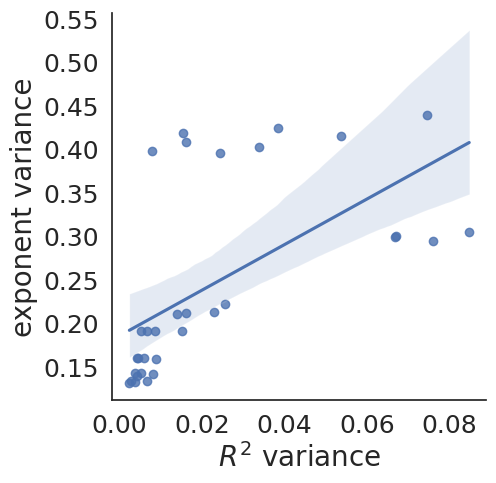

In [178]:
perform_correlation(R2_list,Exp_list)

fig = plt.figure(figsize=(4, 3)) 
seaborn.lmplot(x="R2 variance", y="exponent variance",  data=df1);
plt.ylabel('exponent variance',fontsize=20)
plt.xlabel('$R^2$ variance', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Corr_R2_Exp_Broad_fixed_new.svg")


In [116]:
# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/Aperiodic_sleep_paper/helpers")
from utils import check_distribution, perform_correlation


Using Spearman correlation
Correlation: 0.771618720480893
P-value: 4.159984588226855e-28
Using Spearman correlation
Correlation: 0.28653213110061543
P-value: 0.0007199579714606772


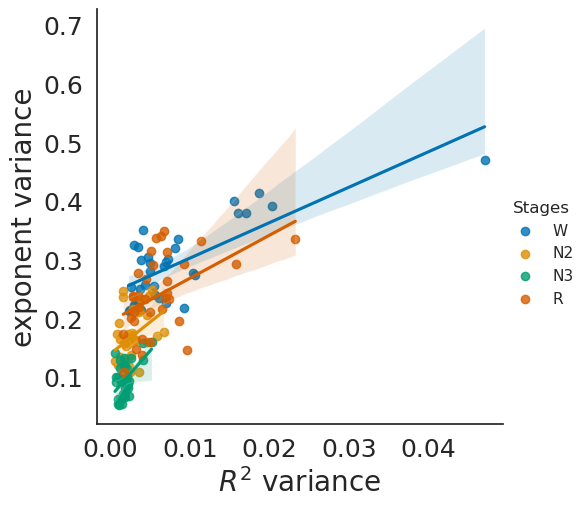

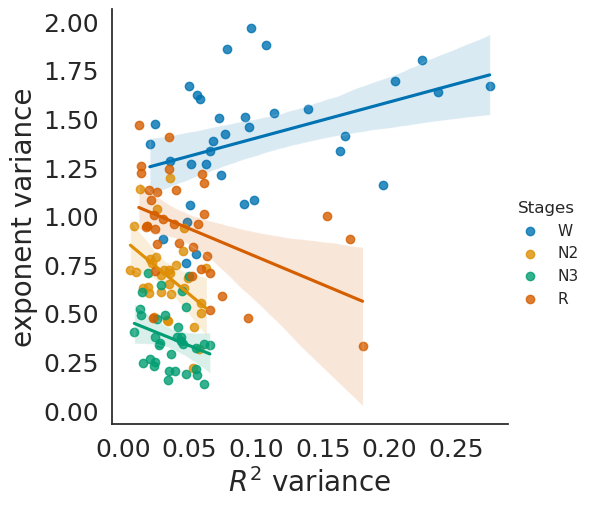

In [138]:

perform_correlation(np.hstack(array_list_B),np.hstack(Exp_list_B))

data = {'R2' : np.hstack(array_list_B),
       'exponent' : np.hstack(Exp_list_B),
       'Stages' : np.repeat(['W','N2','N3','R'], 34, axis=0)}

df2 = pd.DataFrame(data)


# PLOT correlations 
seaborn.lmplot(x="R2", y="exponent", hue="Stages", palette = ColStage, data=df2);

plt.ylabel('exponent variance',fontsize=20)
plt.xlabel('$R^2$ variance', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Corr_R2_Exp_Broad_fixed_new.svg")


##### Narrow
perform_correlation(np.hstack(array_list_N),np.hstack(Exp_list_N))

data = {'R2' : np.hstack(array_list_N),
       'exponent' : np.hstack(Exp_list_N),
       'Stages' : np.repeat(['W','N2','N3','R'], 34, axis=0)}

df2 = pd.DataFrame(data)


# PLOT correlations 
seaborn.lmplot(x="R2", y="exponent", hue="Stages", palette = ColStage, data=df2);

plt.ylabel('exponent variance',fontsize=20)
plt.xlabel('$R^2$ variance', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Corr_R2_Exp_Narrow_Fixed.svg")